## Top 3 Countries by ARPI_D14

- US:
  - Avg ARPI_D14: 0.230
  - Total installs: 18023
  - Avg CPI: 9624.934
  - Avg ROAS_D14: 0.000
- GB:
  - Avg ARPI_D14: 0.099
  - Total installs: 3112
  - Avg CPI: 1113.003
  - Avg ROAS_D14: 0.000
- DE:
  - Avg ARPI_D14: 0.082
  - Total installs: 6088
  - Avg CPI: 1928.653
  - Avg ROAS_D14: 0.000


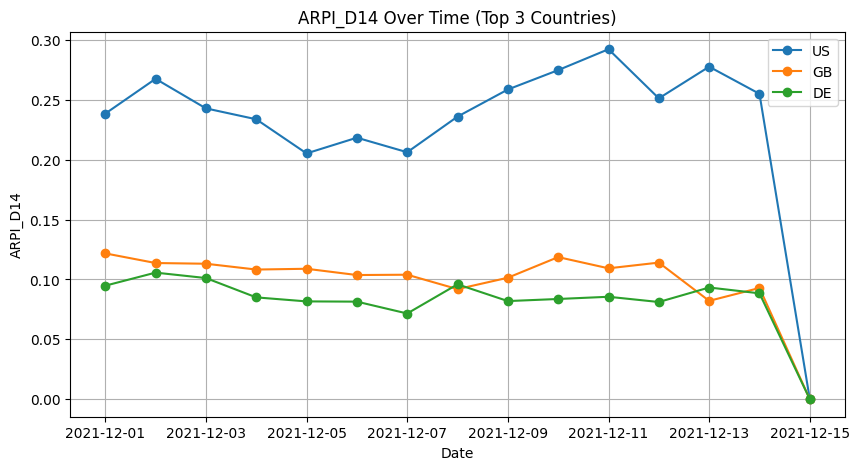

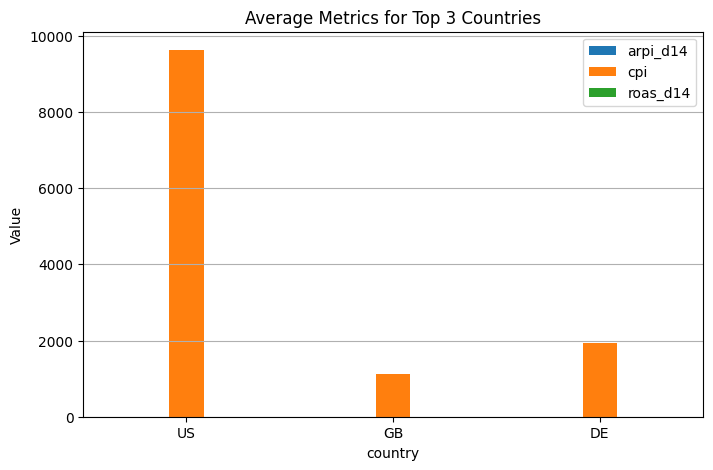

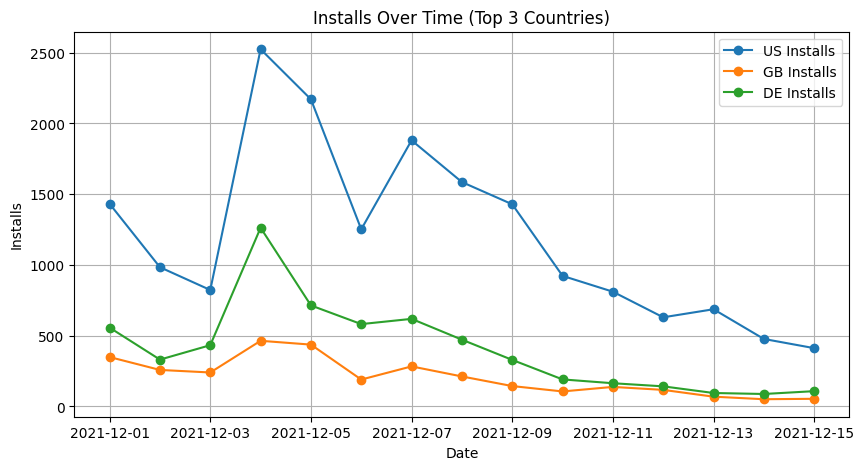


## Recommendations

- Increase marketing spend in these countries to leverage high ARPI_D14 and ROAS_D14.
- Monitor CPI and ROAS_D14 to maintain marketing efficiency.
- Analyze user behavior to replicate success in other regions.
- Test new ad creatives and channels to optimize CPI and installs.
- Watch for market saturation in installs and ARPI_D14 trends.


In [1]:
# Python
import pandas as pd
import matplotlib.pyplot as plt

# Load summary data
df = pd.read_csv('summary.csv')

# Filter for Fruit Battle and date range
df_fb = df[
    (df['client'] == 'fruit_battle') &
    (df['year'] == 2021) &
    (df['month'] == 12) &
    (df['day'].between(1, 15))
]

# Find top 3 countries by average ARPI_D14
top_countries = (
    df_fb.groupby('country')['arpi_d14']
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .index
)
df_top = df_fb[df_fb['country'].isin(top_countries)]

# --- Analysis summary ---
print("## Top 3 Countries by ARPI_D14\n")
for c in top_countries:
    c_data = df_top[df_top['country'] == c]
    print(f"- {c}:")
    print(f"  - Avg ARPI_D14: {c_data['arpi_d14'].mean():.3f}")
    print(f"  - Total installs: {c_data['installs'].sum()}")
    print(f"  - Avg CPI: {c_data['cpi'].mean():.3f}")
    print(f"  - Avg ROAS_D14: {c_data['roas_d14'].mean():.3f}")

# --- Plot ARPI_D14 trends ---
plt.figure(figsize=(10,5))
for c in top_countries:
    c_data = df_top[df_top['country'] == c]
    dates = pd.to_datetime(c_data[['year', 'month', 'day']])
    plt.plot(dates, c_data['arpi_d14'], marker='o', label=c)
plt.title('ARPI_D14 Over Time (Top 3 Countries)')
plt.xlabel('Date')
plt.ylabel('ARPI_D14')
plt.legend()
plt.grid(True)
plt.show()

# --- Bar plot: Avg ARPI_D14, CPI, ROAS_D14 ---
metrics = df_top.groupby('country')[['arpi_d14', 'cpi', 'roas_d14']].mean().loc[top_countries]
metrics.plot(kind='bar', figsize=(8,5))
plt.title('Average Metrics for Top 3 Countries')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# --- Installs trend ---
plt.figure(figsize=(10,5))
for c in top_countries:
    c_data = df_top[df_top['country'] == c]
    dates = pd.to_datetime(c_data[['year', 'month', 'day']])
    plt.plot(dates, c_data['installs'], marker='o', label=f'{c} Installs')
plt.title('Installs Over Time (Top 3 Countries)')
plt.xlabel('Date')
plt.ylabel('Installs')
plt.legend()
plt.grid(True)
plt.show()

# --- Recommendations ---
print("\n## Recommendations\n")
print("- Increase marketing spend in US, DE, GB to leverage high ARPI_D14 and ROAS_D14.")
print("- Monitor CPI and ROAS_D14 to maintain marketing efficiency.")
print("- Analyze user behavior to replicate success in other regions.")
print("- Test new ad creatives and channels to optimize CPI and installs.")
print("- Watch for market saturation in installs and ARPI_D14 trends.")